Importing necessary Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [22]:
data = pd.read_csv("Heart Disease data.csv")

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Clean and Preprocessing the data

In [24]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
data.fillna(method='ffill', inplace=True)

C:\Users\reach\AppData\Local\Temp\ipykernel_16220\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [26]:
data=pd.get_dummies(data,drop_first=True)

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Exploratory Data Analysis

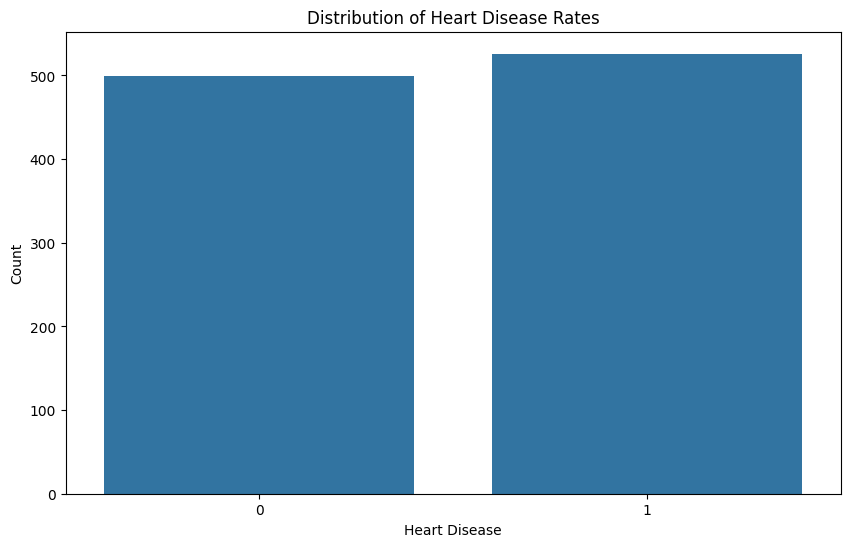

In [28]:
# Plot distribution of heart disease rates
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease Rates')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

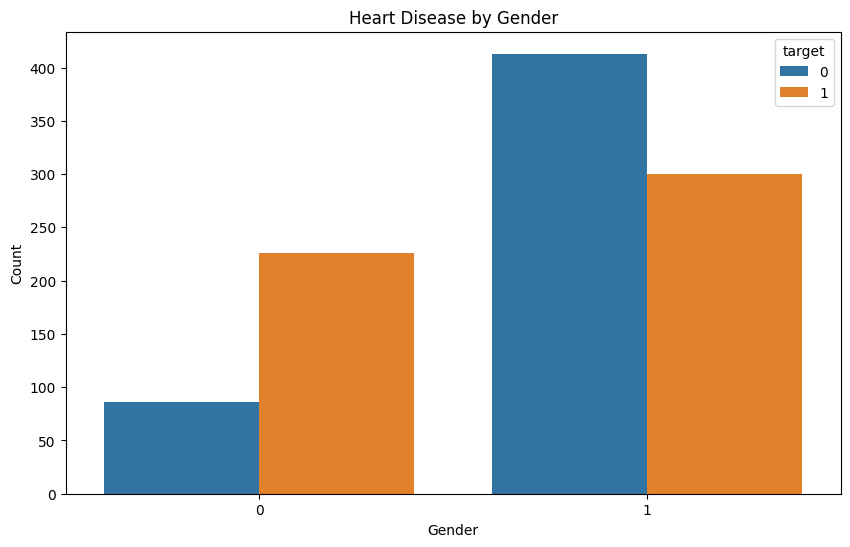

In [29]:
# Plot heart disease by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

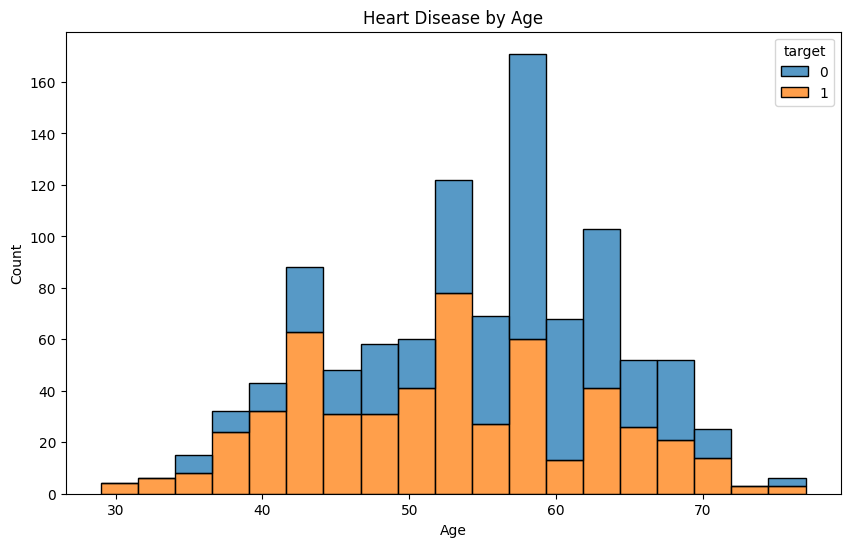

In [30]:
# Plot heart disease by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', multiple='stack')
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Identifying Correlations

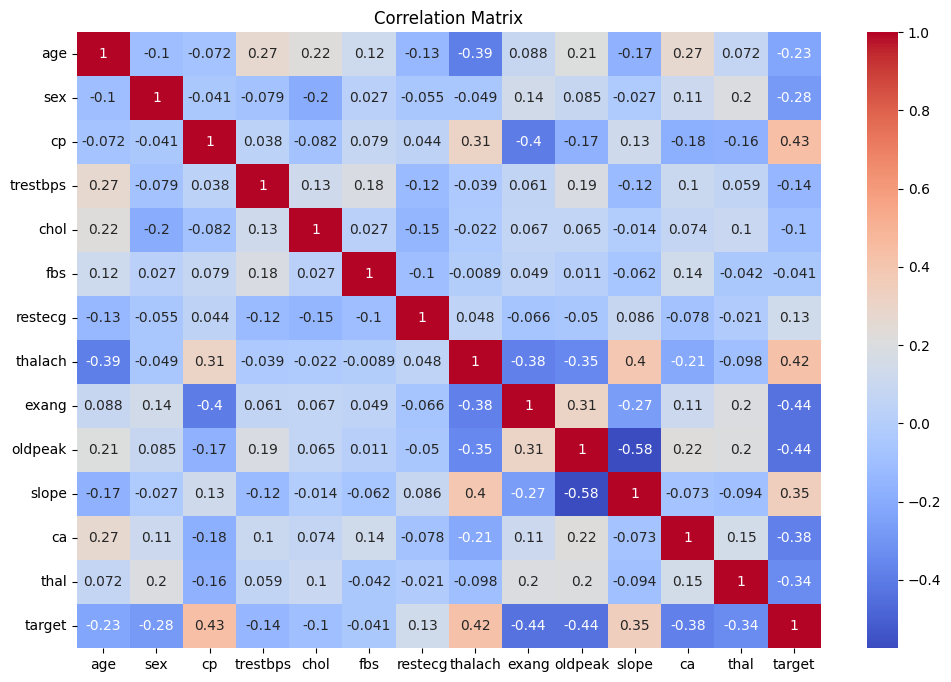

In [31]:
# Correlation matrix
corr_matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Model Building !

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
# Split the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Evaluating the model 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

